### Step 1: Importing and Viewing Data
1. Using the iris dataset
2. 

In [3]:
# Load the iris dataset and viewing the data
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
print(type(iris))

print(iris.keys())
print()

print('Feature names:', iris.feature_names) # Outputs: Column names of the data
print('Data shape:', iris.data.shape) # Ouputs: 0bservations (samples) and features (attributes)
print('Target names:', iris.target_names) # Outputs:The species of the iris flowers (labels for the classification task)
print('Target shape:', iris.target.shape) # Outputs: attribute of the iris dataset (n target values (one for each observation))

x = iris.data
y = iris.target

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data shape: (150, 4)
Target names: ['setosa' 'versicolor' 'virginica']
Target shape: (150,)


### Simple machine learning classifier using scikit-learn (the K-nearest neighbour classifier)
1. 
2. 

### Aside: Pandas DataFrames
1. We can use the 'load_iris' function and add the argument 'as_frame=True', the data is loaded in a Pandas DataFrame format that can be assesed in the attribute 'frame'.

2. The head() function can be used to view the first few rows of out data.

3. In this data, we see that the data DataFrame has four fields of numerical data and the categorical target data, both in the same table. So we have a feature data and then target.


In [ ]:
iris = load_iris(as_frame=True)
df = iris.frame
print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


4. To get only the features, we can use the Pandas function 'drop()'. The 'axis=1' is used to drop the column rather than rows.

5. To extract just a column, you can index the name of the column

In [12]:
X = df.drop('target', axis=1)
print(X.head())
print()
Y = df["target"]
print(Y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


6. Now, we have in a way isolated the features matrix (X), and the target vector (Y).

### Step 2: Visualising the Data

1. Matplotlib serves as a plotting tool that can be used for creating static, interactive, and animated visualizations in Python.

2. e.g visulising a scatterplot of petal width versus sepal width

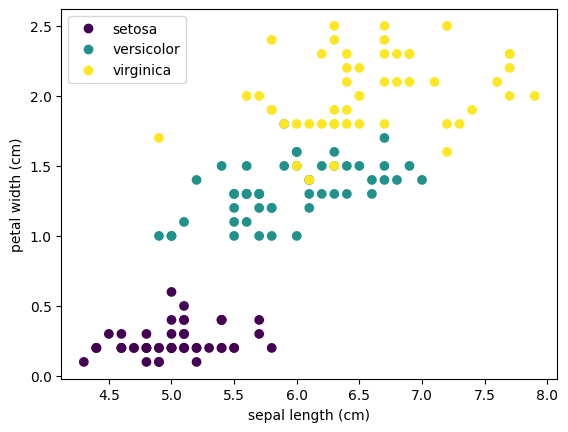

In [17]:
import matplotlib.pyplot as plt

xy_plot = plt.scatter(X['sepal length (cm)'], X['petal width (cm)'], c = Y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')

plt.legend(handles=xy_plot.legend_elements()[0], labels=list(iris.target_names))

plt.show()

### Step 3: Training a Simple Machine Learning Model
1. Now you want to take the iris data and use it to make a model that will predict the species of the new data-points not previously seen by the model

2. The K-nearest neighbour (KNN) method is a simple model

3. The n_neighbours is an important parameter that need be set to initialise the model.

4. The value for the K (number of nearest neighbours) is the number of classifiers considered by the algorithm

5. There is a need to subset the data into test and training dataset to avoid overfitting.

6. The class 'KNeighborsClassifier' implements the k-nearest neighbors algorithm, a simple, supervised machine learning algorithm for classification tasks.

7. 'train_test_split' is used to split the dataset into training and testing sets.

##### Setting Up The Model
1. Create an instance of the 'KNeighborsClassifier model.

2. The parameter 'n_neighbours=3' tells the algorithm to consider the 3 nearest neighbours to infer a prediction

##### Splitting the Data

1. 'train_test_split function is used to split the dataset X (features) and Y (target/labels) into training and testing sets.

2. 'Xtrain and y_train will be used to train the model, while Xtest and y_test will be used to evaluate its performance.

3. 'random_state=13 ensures that the split is reproducible. Setting a random state means that you will get the same split every time you run the code.

##### Traning The Model

1. 'model.fit(Xtrain, y_train) trains the KNeighborsClassifier model using the training data.

2. The 'fit' method takes two argument:
    1. 'Xtrain: the training input samples (features).
    
    2. 'y_train: the target values (labels) corresponding to the training input samples.

In [30]:
# Import and set up the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
model = KNeighborsClassifier(n_neighbors=3)
Xtrain, Xtest, y_train, y_test = train_test_split(X, Y, random_state=15)

model.fit(Xtrain, y_train)

KNeighborsClassifier(n_neighbors=3)

### Step 4: Evaluating the Results
1. Using the data in y_test, we can evaluate the accurateness of the model

2. An handy fucntion in scikit-learn is the accuracy_score that generates a score for the model's accuracy between 0 and 1

3. 

In [31]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(Xtest)
score = accuracy_score(y_test, y_predicted)
print(score)

0.9736842105263158


1. To find out which instances have been misclassified, we look at the values in Xtest for which the predicted answer does not equal the true value

2. You can then plot your results to visualise where the misclassified items are.

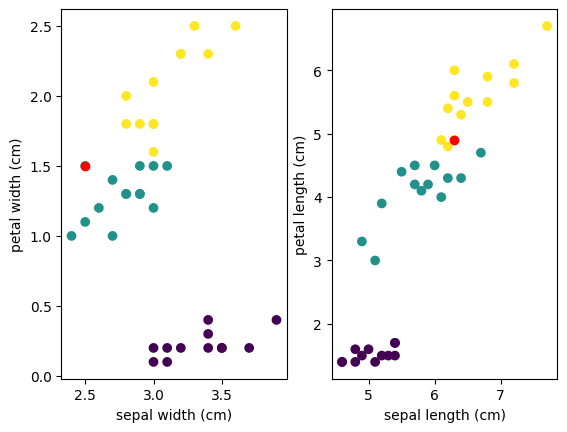

In [32]:
X_misclass = Xtest[y_test != y_predicted]

# set up and select first of two subplots
plt.subplot(1,2,1)

# plot test data (sepal width vs petal width)
plt.scatter(Xtest['sepal width (cm)'], Xtest['petal width (cm)'], c = y_test)

# plot misclassified items
plt.scatter(X_misclass['sepal width (cm)'], X_misclass['petal width (cm)'], c = 'r')

# label axes
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

# move to second subplot
plt.subplot(1,2,2)

# plot test data (sepal length vs petal length)
plt.scatter(Xtest['sepal length (cm)'], Xtest['petal length (cm)'], c = y_predicted)

# plot misclassified items
plt.scatter(X_misclass['sepal length (cm)'], X_misclass['petal length (cm)'], c='r')

# label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

# show plot
plt.show()